# <center>Credit Card Fraud Detection</center>

![title](6credit.jpg)

### Load Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import gridspec

from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

import xgboost as xgb
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,\
roc_auc_score,classification_report

%matplotlib inline

## Read the Data

In [2]:
# reading the data
df=pd.read_csv("C:\datasets\creditcard.csv")

### Glimpse the Data

In [3]:
df.head(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


### Check Missing Data 

In [5]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Unbalance

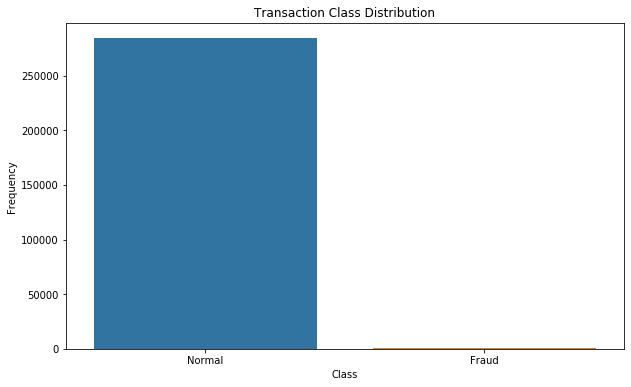

In [6]:
# for checking imbalance in dataset
plt.figure(figsize=(10,6))
sns.countplot(x='Class',data=df)
plt.title("Transaction Class Distribution",)
plt.xticks(range(2),["Normal","Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency");
plt.show()


## Data Exploration

#### Transactions in time 

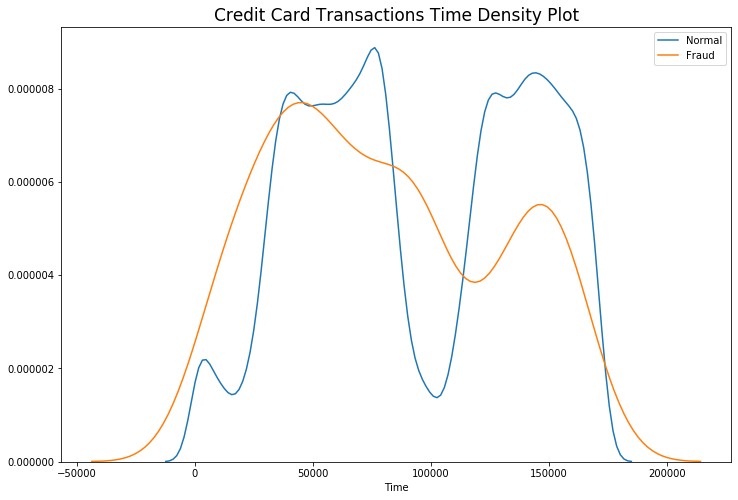

In [7]:
# transactions in time
plt.figure(figsize=(12,8))

class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

sns.distplot(class_0,kde=True,hist=False,label="Normal")
sns.distplot(class_1,kde=True,hist=False,label="Fraud")
plt.title('Credit Card Transactions Time Density Plot', fontsize=17)
plt.legend()
plt.show()

#### Amount Transacted

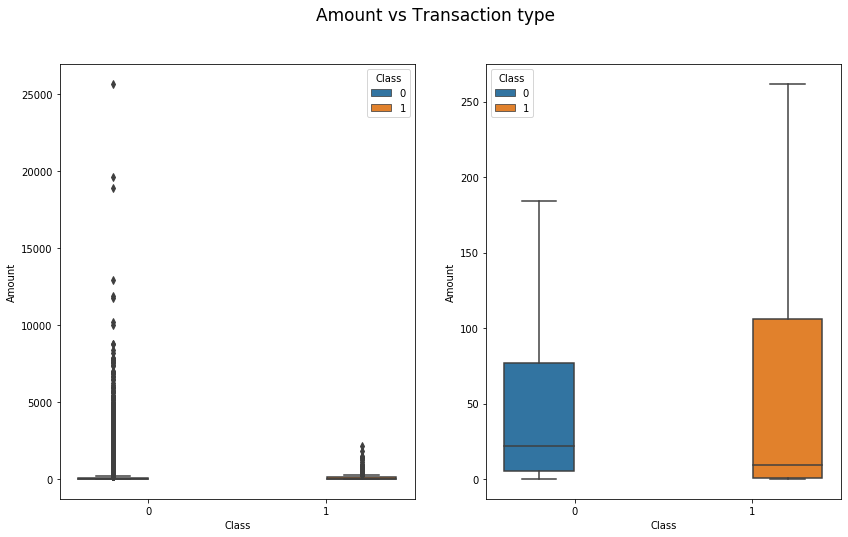

In [8]:
#Amount Transacted
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,8))
s1 = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df,showfliers=True)

fig.suptitle("Amount vs Transaction type ",fontsize=17)
s2 = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df,showfliers=False)
plt.show();

In [9]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Fraud Transactions

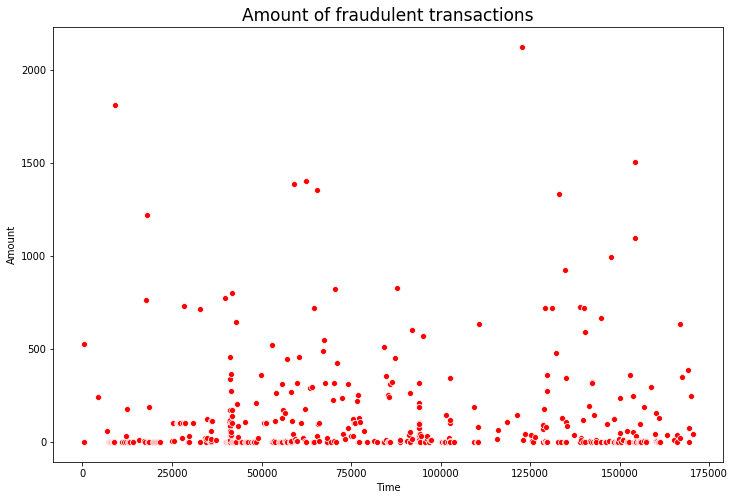

In [11]:
# fraud transactions
fraud = df.loc[df['Class'] == 1]

plt.figure(figsize=(12,8))
sns.scatterplot(x="Time",y="Amount",data=fraud,color="Red")
plt.title('Amount of fraudulent transactions',fontsize=17)
plt.show()

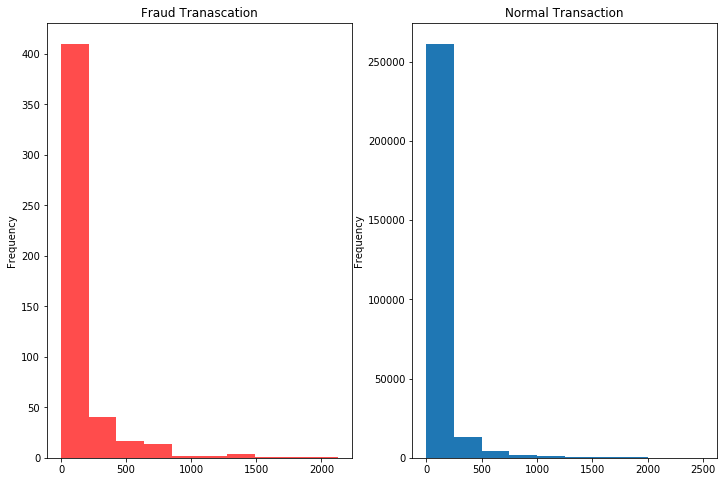

In [12]:
# fraud transaction freequency
Fraud_transacation = df[df["Class"]==1]
Normal_transacation= df[df["Class"]==0]
plt.figure(figsize=(12,8))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation",color='red',alpha=0.7)
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")
plt.show()

## Feature Correlation

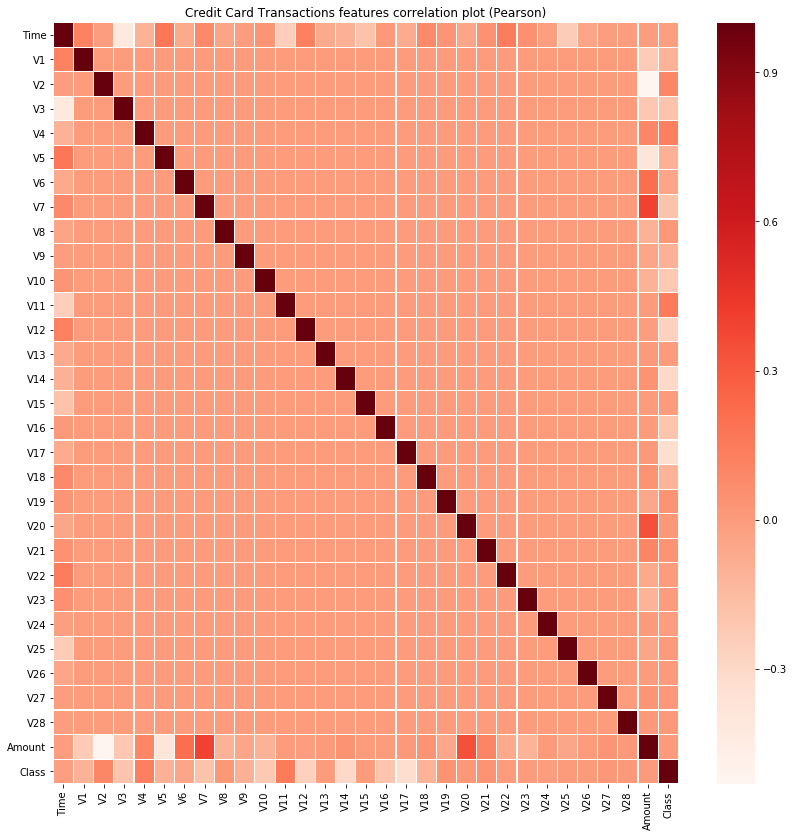

In [13]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

- As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).
- Let's plot the correlated and inverse correlated values on the same graph.
- Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

<Figure size 864x576 with 0 Axes>

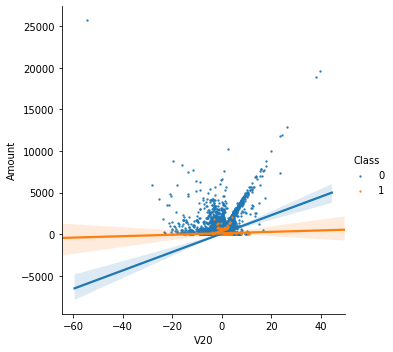

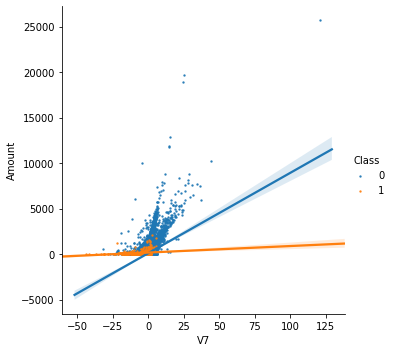

In [14]:
plt.figure(figsize=(12,8))

s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

- We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, while the regression line for Class = 1 have a smaller positive slope).
- Let's plot now the inverse correlated values.

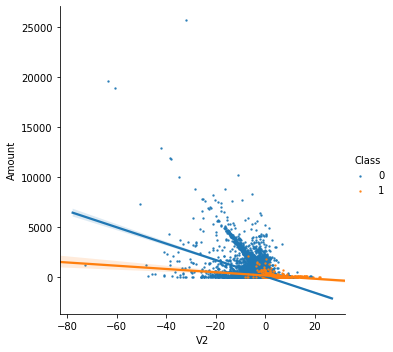

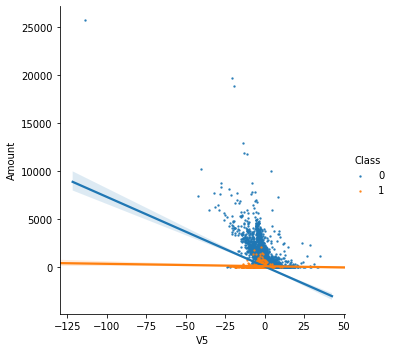

In [15]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

### Divergence difference

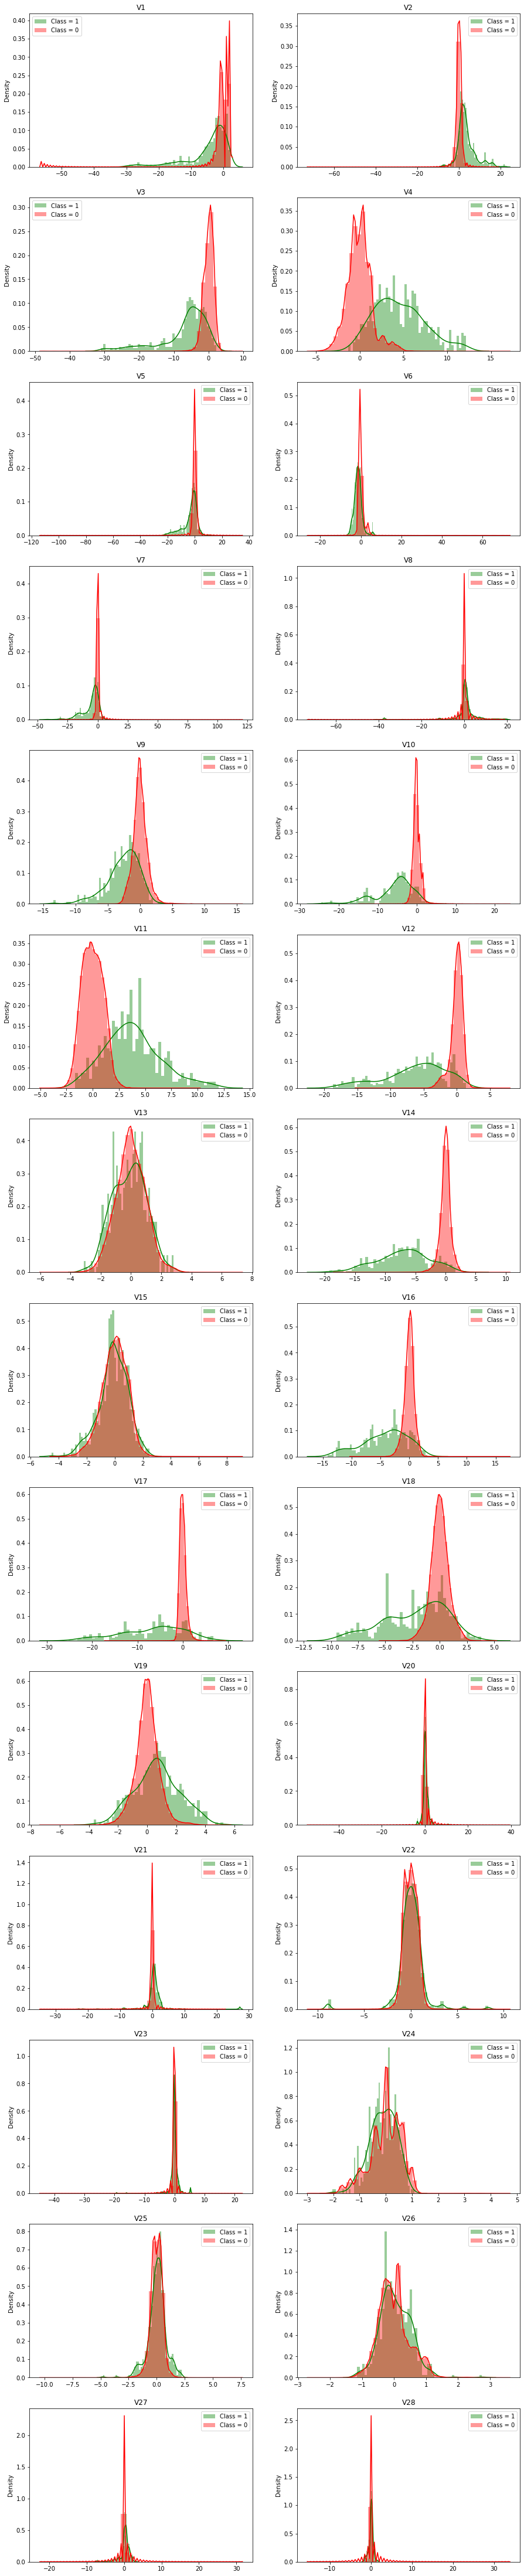

In [16]:
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='g',label = "Class = 1") 
    sns.distplot(df[col][normals], bins = 50, color='r',label = "Class = 0") 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    plt.legend()
plt.show()

## Predictive Models

In [17]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

#### Split data in train, test and validation set


In [18]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=7, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.20, random_state=7, shuffle=True )

In [19]:
trainx=train_df[predictors]
trainy=train_df[target].values
testx=valid_df[predictors]
testy=valid_df[target].values

In [20]:
print (trainx)

            Time        V1        V2        V3        V4        V5        V6  \
279133  168668.0 -1.114268 -0.939661 -0.849715 -2.223154  0.651022 -0.256251   
58359    48347.0 -1.742608 -0.077944  0.290387 -1.203755  0.099687 -0.463880   
183453  125803.0  1.965487 -0.481074 -0.432510 -0.044586 -0.525758 -0.029390   
198151  132352.0 -2.754416  0.602385 -1.595580 -0.554455  0.019097 -0.294451   
246610  153245.0  2.005190 -1.948547 -0.991201 -1.253118 -1.379477 -0.084160   
...          ...       ...       ...       ...       ...       ...       ...   
160755  113610.0 -2.915718  3.221471 -1.651233  4.248126 -0.972754  1.493450   
246076  153026.0  1.977462 -0.367145 -0.437005  0.198652 -0.492144 -0.209766   
36392    38518.0 -1.267760  0.818394 -3.106101  1.728055  1.130903 -1.360229   
60869    49541.0 -0.371699  1.012154  1.111037 -0.428217  0.610165  0.108687   
232594  147230.0 -1.437791  0.935561 -1.286719  0.865287  1.295407  0.693366   

              V7        V8        V9  .

In [21]:
print (trainy)

[0 0 0 ... 0 0 0]


###  precision recall graph 

In [22]:
from sklearn.metrics import f1_score

def plot_PrecRecall(xtest,ytest,lbl,clf):
    no_skill_probs = [0 for _ in range(len(xtest))]
    lr_probs = clf.predict_proba(xtest)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # predict class values
    yhat = clf.predict(xtest)
    # calculate precision and recall for each threshold
    ns_precision, ns_recall, _ = precision_recall_curve(ytest, no_skill_probs)
    lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
    # calculate scores
    ns_f1, ns_auc = f1_score(ytest, no_skill_probs), auc(ns_recall, ns_precision)
    lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
    # summarize scores
    # plot the precision-recall curves
    plt.figure(figsize=(9,7))
    plt.plot(ns_recall, ns_precision, linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label=lbl)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

##  RandomForestClassifier 

### Define model parameters


Let's set the parameters for the model.
Let's run a model using the training set for training. Then, we will use the validation set for validation.

We start by initializing the RandomForestClassifier.

In [23]:
clf = RandomForestClassifier(n_jobs=-1, 
                             random_state=7,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

Let's train the RandonForestClassifier using the train_df data and fit function.

In [24]:
clf.fit(trainx, trainy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7,
                       verbose=False, warm_start=False)

Let's now predict the target values for the valid_df data, using predict function.

In [25]:
preds = clf.predict(testx)

### Features importance

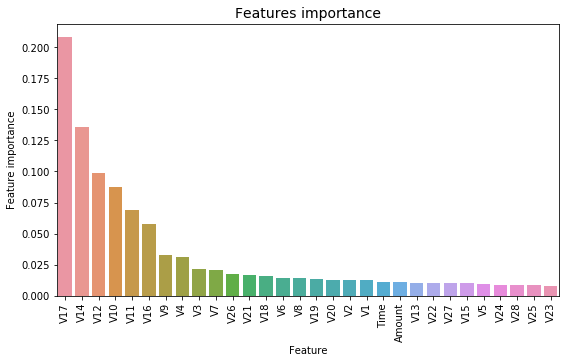

In [26]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (9,5))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

The most important features are V17, V12, V14, V10, V11, V16.


### Confusion matrix

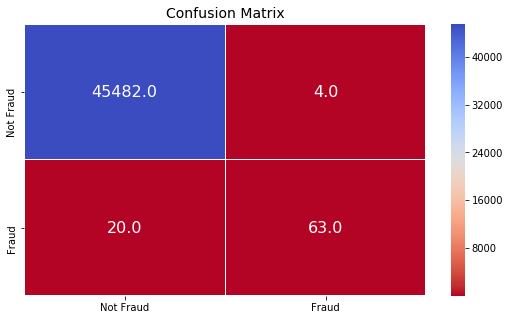

In [27]:
#cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
cnf_matrix=confusion_matrix(testy,preds)
#fig, (ax1) = plt.subplots(ncols=1, figsize=(9,9))
fig= plt.figure(figsize=(9,5))
sns.heatmap(cnf_matrix, xticklabels=['Not Fraud', 'Fraud'],yticklabels=['Not Fraud', 'Fraud'],
           cmap="coolwarm_r",annot=True,linewidths=0.1,fmt='.1f',annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [28]:
classificationReport=classification_report(testy, preds)
print(classificationReport)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45486
           1       0.94      0.76      0.84        83

    accuracy                           1.00     45569
   macro avg       0.97      0.88      0.92     45569
weighted avg       1.00      1.00      1.00     45569



In [29]:
roc_auc_score(testy, preds)

0.8794741027161013

The ROC-AUC score obtained with RandomForrestClassifier is ***0.87***.

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


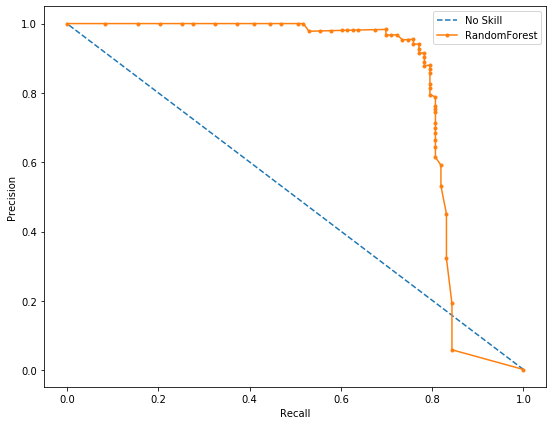

In [30]:
plot_PrecRecall(testx,testy,"RandomForest",clf)

In [31]:
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators': [10,100,50],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3]}
clf = RandomForestClassifier()
grid_gbm = GridSearchCV(estimator=clf, param_grid = grid_values, cv= 3,n_jobs=-1)
X_train=train_df[predictors]
y_train=train_df[target].values
grid_gbm.fit(X_train, y_train)

print('Accuracy Score : ' + str(grid_gbm.best_score_))
print('Accuracy Score : ' + str(grid_gbm.best_params_))

KeyboardInterrupt: 

## AdaBoostClassifier

### Prepare the model
Let's set the parameters for the model and initialize the model.

In [32]:
clf = AdaBoostClassifier(random_state=7,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=100)

### Fit the model
Let's fit the model

In [33]:
clf.fit(trainx, trainy)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=7)

### Predict the target values
Let's now predict the target values for the valid_df data, using predict function.

In [34]:
preds = clf.predict(testx)

### Features importance


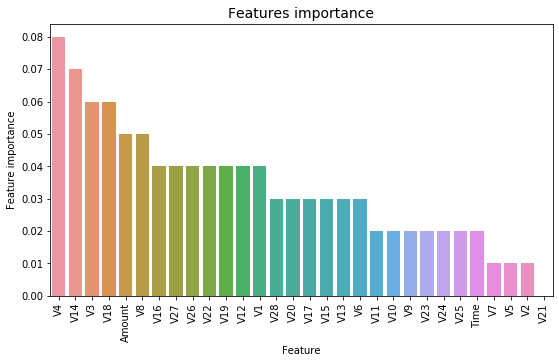

In [35]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (9,5))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

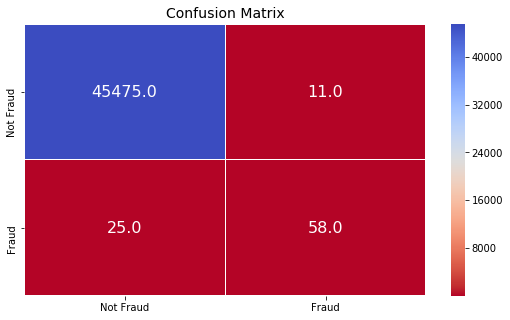

In [36]:
cnf_matrix=confusion_matrix(testy,preds)
fig= plt.figure(figsize=(9,5))
sns.heatmap(cnf_matrix, xticklabels=['Not Fraud', 'Fraud'],yticklabels=['Not Fraud', 'Fraud'],
           cmap="coolwarm_r",annot=True,linewidths=0.1,fmt='.1f',annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [37]:
classificationReport=classification_report(testy, preds)
print(classificationReport)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45486
           1       0.84      0.70      0.76        83

    accuracy                           1.00     45569
   macro avg       0.92      0.85      0.88     45569
weighted avg       1.00      1.00      1.00     45569



In [38]:
roc_auc_score(testy, preds)

0.8492766740355433

The ROC-AUC score obtained with AdaBoostClassifier is ***0.84***.

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


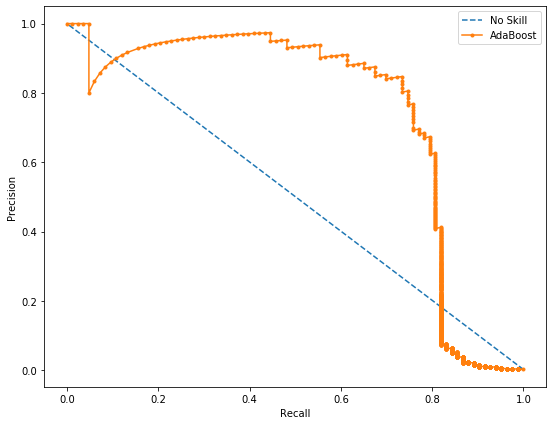

In [39]:
plot_PrecRecall(testx,testy,"AdaBoost",clf)

### install imblearn

In [40]:
!pip install imblearn  

## SMOTE ANALYSIS

![title](SMOTE1.png)

In [41]:
# Lets Use SMOTE for Sampling
# It is also a type of oversampling but in this the data is not replicated but they are created 
# importing libraries
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0) #   We are using SMOTE as the function for oversampling
columns = trainx.columns

Using TensorFlow backend.


In [42]:
os_data_X,os_data_y=os.fit_sample(trainx,trainy)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("No.of fraud transcation",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

length of oversampled data is  363934
Number of normal transcation in oversampled data 181967
No.of fraud transcation 181967
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


In [43]:
os_data_X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,168668.0,-1.114268,-0.939661,-0.849715,-2.223154,0.651022,-0.256251,0.407024,0.362084,-1.450059,...,0.467098,0.280692,0.083161,0.238981,-1.453989,-0.436743,-0.494773,0.003551,0.000556,174.46
1,48347.0,-1.742608,-0.077944,0.290387,-1.203755,0.099687,-0.463880,1.964259,-0.707719,0.687589,...,-0.046563,-0.271798,0.362394,0.245631,0.093082,-0.271621,0.791297,-0.058851,0.263143,194.00
2,125803.0,1.965487,-0.481074,-0.432510,-0.044586,-0.525758,-0.029390,-0.727278,0.220200,1.196791,...,-0.247555,-0.154144,-0.397299,0.437751,0.651256,-0.561711,-0.330499,-0.001387,-0.042289,1.85
3,132352.0,-2.754416,0.602385,-1.595580,-0.554455,0.019097,-0.294451,0.158999,1.252481,-0.342370,...,-0.201988,-0.069204,-0.604087,-0.420784,0.193708,0.151687,-0.131419,-0.171765,-0.224107,125.43
4,153245.0,2.005190,-1.948547,-0.991201,-1.253118,-1.379477,-0.084160,-1.056238,-0.010702,-0.862151,...,-0.268045,-0.425276,-0.790384,0.168759,-0.429551,-0.233072,-0.326750,-0.003774,-0.047645,134.06


In [44]:
from sklearn.preprocessing import StandardScaler
os_data_X["Normalized Amount"] = StandardScaler().fit_transform(os_data_X['Amount'].values.reshape(-1, 1))
os_data_X.drop(["Time","Amount"],axis=1,inplace=True)
testx["Normalized Amount"] = StandardScaler().fit_transform(testx['Amount'].values.reshape(-1, 1))
testx.drop(["Time","Amount"],axis=1,inplace=True)

## RandomForest Classifier

### Build Model

Let's set the parameters for the model.
Let's run a model using the training set for training. Then, we will use the validation set for validation.

We start by initializing the RandomForestClassifier.

In [45]:
clf = RandomForestClassifier(n_jobs=-1, 
                             random_state=7,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

Let's train the RandonForestClassifier using the synthetic data and fit function.

In [46]:
clf.fit(os_data_X, os_data_y.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7,
                       verbose=False, warm_start=False)

In [47]:
preds = clf.predict(testx)

### Classification Report

In [48]:
classificationReport=classification_report(testy, preds)
print(classificationReport)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45486
           1       0.84      0.81      0.82        83

    accuracy                           1.00     45569
   macro avg       0.92      0.90      0.91     45569
weighted avg       1.00      1.00      1.00     45569



In [49]:
roc_auc_score(testy, preds)

0.9034715567188951

The ROC-AUC score obtained with AdaBoostClassifier is ***0.90***.

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


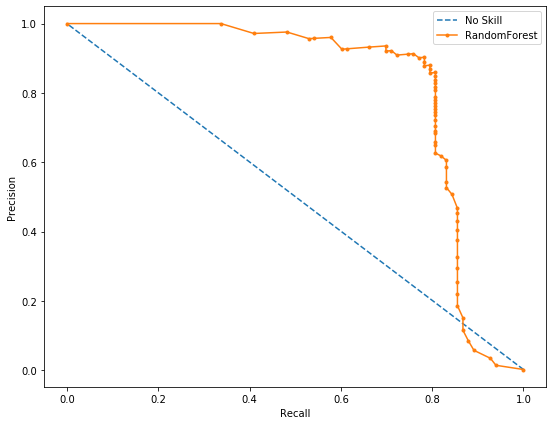

In [50]:
plot_PrecRecall(testx,testy,"RandomForest",clf)

## ADA Boost Classifier

### Prepare the model
Let's set the parameters for the model and initialize the model.

In [51]:
clf = AdaBoostClassifier(random_state=7,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=100)

### Fit the model

In [52]:
clf.fit(os_data_X, os_data_y.values.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=7)

In [53]:
preds = clf.predict(testx)

### Classification Report

In [54]:
classificationReport=classification_report(testy, preds)
print(classificationReport)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     45486
           1       0.17      0.82      0.28        83

    accuracy                           0.99     45569
   macro avg       0.59      0.91      0.64     45569
weighted avg       1.00      0.99      0.99     45569



In [55]:
roc_auc_score(testy, preds)

0.9060110644397932

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


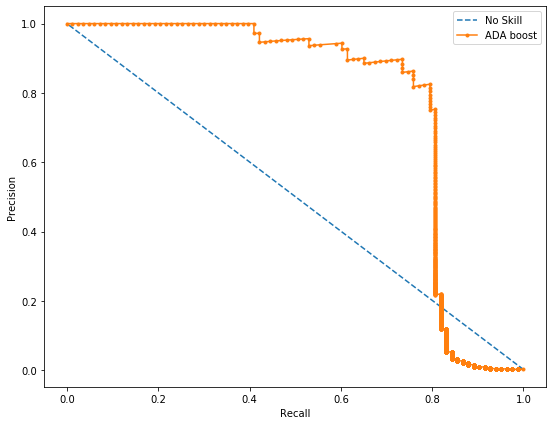

In [56]:
plot_PrecRecall(testx,testy,"ADA boost",clf)

## Final Model

In [57]:
fin_clf = RandomForestClassifier(n_jobs=-1, 
                             random_state=7,
                             criterion='gini',
                             n_estimators=50,
                             verbose=False)
fin_clf.fit(os_data_X, os_data_y.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=7, verbose=False,
                       warm_start=False)

In [109]:
def final_predict(test,fin_clf):
    pred=fin_clf.predict(test)
    count =0
    Dict={0:'valid',1:'fraud'}
    for i in range(len(pred)):
        if pred[i] == 1:
            print("Fraud transaction is {}".format(i+1))
            count=count+1
    print(' ')        
    print("Total Transactions: {} ".format(len(pred)))
    print("Total Fraud Transactions: {}".format(count))
    print(' ')
    for j in range(len(pred)):
        print("The transaction number {} is {}".format(j+1,Dict[pred[j]]))
    
    
    


In [59]:
final_test=test_df[predictors]

In [60]:
final_test["Normalized Amount"] = StandardScaler().fit_transform(final_test['Amount'].values.reshape(-1, 1))
final_test.drop(["Time","Amount"],axis=1,inplace=True)


In [92]:
final_predict(final_test,fin_clf)

Fraud transaction is 680
Fraud transaction is 814
Fraud transaction is 2998
Fraud transaction is 3219
Fraud transaction is 3692
Fraud transaction is 3915
Fraud transaction is 4573
Fraud transaction is 4975
Fraud transaction is 5070
Fraud transaction is 6045
Fraud transaction is 6899
Fraud transaction is 7903
Fraud transaction is 7933
Fraud transaction is 10392
Fraud transaction is 10992
Fraud transaction is 11264
Fraud transaction is 12811
Fraud transaction is 12902
Fraud transaction is 13500
Fraud transaction is 13699
Fraud transaction is 14036
Fraud transaction is 14388
Fraud transaction is 14590
Fraud transaction is 15924
Fraud transaction is 16290
Fraud transaction is 16448
Fraud transaction is 16491
Fraud transaction is 17395
Fraud transaction is 17747
Fraud transaction is 17756
Fraud transaction is 18806
Fraud transaction is 20884
Fraud transaction is 22346
Fraud transaction is 22542
Fraud transaction is 23061
Fraud transaction is 23165
Fraud transaction is 24408
Fraud transactio

The transaction number 1419 is 0
The transaction number 1420 is 0
The transaction number 1421 is 0
The transaction number 1422 is 0
The transaction number 1423 is 0
The transaction number 1424 is 0
The transaction number 1425 is 0
The transaction number 1426 is 0
The transaction number 1427 is 0
The transaction number 1428 is 0
The transaction number 1429 is 0
The transaction number 1430 is 0
The transaction number 1431 is 0
The transaction number 1432 is 0
The transaction number 1433 is 0
The transaction number 1434 is 0
The transaction number 1435 is 0
The transaction number 1436 is 0
The transaction number 1437 is 0
The transaction number 1438 is 0
The transaction number 1439 is 0
The transaction number 1440 is 0
The transaction number 1441 is 0
The transaction number 1442 is 0
The transaction number 1443 is 0
The transaction number 1444 is 0
The transaction number 1445 is 0
The transaction number 1446 is 0
The transaction number 1447 is 0
The transaction number 1448 is 0
The transa

The transaction number 3195 is 0
The transaction number 3196 is 0
The transaction number 3197 is 0
The transaction number 3198 is 0
The transaction number 3199 is 0
The transaction number 3200 is 0
The transaction number 3201 is 0
The transaction number 3202 is 0
The transaction number 3203 is 0
The transaction number 3204 is 0
The transaction number 3205 is 0
The transaction number 3206 is 0
The transaction number 3207 is 0
The transaction number 3208 is 0
The transaction number 3209 is 0
The transaction number 3210 is 0
The transaction number 3211 is 0
The transaction number 3212 is 0
The transaction number 3213 is 0
The transaction number 3214 is 0
The transaction number 3215 is 0
The transaction number 3216 is 0
The transaction number 3217 is 0
The transaction number 3218 is 0
The transaction number 3219 is 1
The transaction number 3220 is 0
The transaction number 3221 is 0
The transaction number 3222 is 0
The transaction number 3223 is 0
The transaction number 3224 is 0
The transa

The transaction number 4940 is 0
The transaction number 4941 is 0
The transaction number 4942 is 0
The transaction number 4943 is 0
The transaction number 4944 is 0
The transaction number 4945 is 0
The transaction number 4946 is 0
The transaction number 4947 is 0
The transaction number 4948 is 0
The transaction number 4949 is 0
The transaction number 4950 is 0
The transaction number 4951 is 0
The transaction number 4952 is 0
The transaction number 4953 is 0
The transaction number 4954 is 0
The transaction number 4955 is 0
The transaction number 4956 is 0
The transaction number 4957 is 0
The transaction number 4958 is 0
The transaction number 4959 is 0
The transaction number 4960 is 0
The transaction number 4961 is 0
The transaction number 4962 is 0
The transaction number 4963 is 0
The transaction number 4964 is 0
The transaction number 4965 is 0
The transaction number 4966 is 0
The transaction number 4967 is 0
The transaction number 4968 is 0
The transaction number 4969 is 0
The transa

The transaction number 6763 is 0
The transaction number 6764 is 0
The transaction number 6765 is 0
The transaction number 6766 is 0
The transaction number 6767 is 0
The transaction number 6768 is 0
The transaction number 6769 is 0
The transaction number 6770 is 0
The transaction number 6771 is 0
The transaction number 6772 is 0
The transaction number 6773 is 0
The transaction number 6774 is 0
The transaction number 6775 is 0
The transaction number 6776 is 0
The transaction number 6777 is 0
The transaction number 6778 is 0
The transaction number 6779 is 0
The transaction number 6780 is 0
The transaction number 6781 is 0
The transaction number 6782 is 0
The transaction number 6783 is 0
The transaction number 6784 is 0
The transaction number 6785 is 0
The transaction number 6786 is 0
The transaction number 6787 is 0
The transaction number 6788 is 0
The transaction number 6789 is 0
The transaction number 6790 is 0
The transaction number 6791 is 0
The transaction number 6792 is 0
The transa

The transaction number 8449 is 0
The transaction number 8450 is 0
The transaction number 8451 is 0
The transaction number 8452 is 0
The transaction number 8453 is 0
The transaction number 8454 is 0
The transaction number 8455 is 0
The transaction number 8456 is 0
The transaction number 8457 is 0
The transaction number 8458 is 0
The transaction number 8459 is 0
The transaction number 8460 is 0
The transaction number 8461 is 0
The transaction number 8462 is 0
The transaction number 8463 is 0
The transaction number 8464 is 0
The transaction number 8465 is 0
The transaction number 8466 is 0
The transaction number 8467 is 0
The transaction number 8468 is 0
The transaction number 8469 is 0
The transaction number 8470 is 0
The transaction number 8471 is 0
The transaction number 8472 is 0
The transaction number 8473 is 0
The transaction number 8474 is 0
The transaction number 8475 is 0
The transaction number 8476 is 0
The transaction number 8477 is 0
The transaction number 8478 is 0
The transa

The transaction number 9812 is 0
The transaction number 9813 is 0
The transaction number 9814 is 0
The transaction number 9815 is 0
The transaction number 9816 is 0
The transaction number 9817 is 0
The transaction number 9818 is 0
The transaction number 9819 is 0
The transaction number 9820 is 0
The transaction number 9821 is 0
The transaction number 9822 is 0
The transaction number 9823 is 0
The transaction number 9824 is 0
The transaction number 9825 is 0
The transaction number 9826 is 0
The transaction number 9827 is 0
The transaction number 9828 is 0
The transaction number 9829 is 0
The transaction number 9830 is 0
The transaction number 9831 is 0
The transaction number 9832 is 0
The transaction number 9833 is 0
The transaction number 9834 is 0
The transaction number 9835 is 0
The transaction number 9836 is 0
The transaction number 9837 is 0
The transaction number 9838 is 0
The transaction number 9839 is 0
The transaction number 9840 is 0
The transaction number 9841 is 0
The transa

The transaction number 11829 is 0
The transaction number 11830 is 0
The transaction number 11831 is 0
The transaction number 11832 is 0
The transaction number 11833 is 0
The transaction number 11834 is 0
The transaction number 11835 is 0
The transaction number 11836 is 0
The transaction number 11837 is 0
The transaction number 11838 is 0
The transaction number 11839 is 0
The transaction number 11840 is 0
The transaction number 11841 is 0
The transaction number 11842 is 0
The transaction number 11843 is 0
The transaction number 11844 is 0
The transaction number 11845 is 0
The transaction number 11846 is 0
The transaction number 11847 is 0
The transaction number 11848 is 0
The transaction number 11849 is 0
The transaction number 11850 is 0
The transaction number 11851 is 0
The transaction number 11852 is 0
The transaction number 11853 is 0
The transaction number 11854 is 0
The transaction number 11855 is 0
The transaction number 11856 is 0
The transaction number 11857 is 0
The transactio

The transaction number 13053 is 0
The transaction number 13054 is 0
The transaction number 13055 is 0
The transaction number 13056 is 0
The transaction number 13057 is 0
The transaction number 13058 is 0
The transaction number 13059 is 0
The transaction number 13060 is 0
The transaction number 13061 is 0
The transaction number 13062 is 0
The transaction number 13063 is 0
The transaction number 13064 is 0
The transaction number 13065 is 0
The transaction number 13066 is 0
The transaction number 13067 is 0
The transaction number 13068 is 0
The transaction number 13069 is 0
The transaction number 13070 is 0
The transaction number 13071 is 0
The transaction number 13072 is 0
The transaction number 13073 is 0
The transaction number 13074 is 0
The transaction number 13075 is 0
The transaction number 13076 is 0
The transaction number 13077 is 0
The transaction number 13078 is 0
The transaction number 13079 is 0
The transaction number 13080 is 0
The transaction number 13081 is 0
The transactio

The transaction number 15039 is 0
The transaction number 15040 is 0
The transaction number 15041 is 0
The transaction number 15042 is 0
The transaction number 15043 is 0
The transaction number 15044 is 0
The transaction number 15045 is 0
The transaction number 15046 is 0
The transaction number 15047 is 0
The transaction number 15048 is 0
The transaction number 15049 is 0
The transaction number 15050 is 0
The transaction number 15051 is 0
The transaction number 15052 is 0
The transaction number 15053 is 0
The transaction number 15054 is 0
The transaction number 15055 is 0
The transaction number 15056 is 0
The transaction number 15057 is 0
The transaction number 15058 is 0
The transaction number 15059 is 0
The transaction number 15060 is 0
The transaction number 15061 is 0
The transaction number 15062 is 0
The transaction number 15063 is 0
The transaction number 15064 is 0
The transaction number 15065 is 0
The transaction number 15066 is 0
The transaction number 15067 is 0
The transactio

The transaction number 16827 is 0
The transaction number 16828 is 0
The transaction number 16829 is 0
The transaction number 16830 is 0
The transaction number 16831 is 0
The transaction number 16832 is 0
The transaction number 16833 is 0
The transaction number 16834 is 0
The transaction number 16835 is 0
The transaction number 16836 is 0
The transaction number 16837 is 0
The transaction number 16838 is 0
The transaction number 16839 is 0
The transaction number 16840 is 0
The transaction number 16841 is 0
The transaction number 16842 is 0
The transaction number 16843 is 0
The transaction number 16844 is 0
The transaction number 16845 is 0
The transaction number 16846 is 0
The transaction number 16847 is 0
The transaction number 16848 is 0
The transaction number 16849 is 0
The transaction number 16850 is 0
The transaction number 16851 is 0
The transaction number 16852 is 0
The transaction number 16853 is 0
The transaction number 16854 is 0
The transaction number 16855 is 0
The transactio

The transaction number 18827 is 0
The transaction number 18828 is 0
The transaction number 18829 is 0
The transaction number 18830 is 0
The transaction number 18831 is 0
The transaction number 18832 is 0
The transaction number 18833 is 0
The transaction number 18834 is 0
The transaction number 18835 is 0
The transaction number 18836 is 0
The transaction number 18837 is 0
The transaction number 18838 is 0
The transaction number 18839 is 0
The transaction number 18840 is 0
The transaction number 18841 is 0
The transaction number 18842 is 0
The transaction number 18843 is 0
The transaction number 18844 is 0
The transaction number 18845 is 0
The transaction number 18846 is 0
The transaction number 18847 is 0
The transaction number 18848 is 0
The transaction number 18849 is 0
The transaction number 18850 is 0
The transaction number 18851 is 0
The transaction number 18852 is 0
The transaction number 18853 is 0
The transaction number 18854 is 0
The transaction number 18855 is 0
The transactio

The transaction number 20651 is 0
The transaction number 20652 is 0
The transaction number 20653 is 0
The transaction number 20654 is 0
The transaction number 20655 is 0
The transaction number 20656 is 0
The transaction number 20657 is 0
The transaction number 20658 is 0
The transaction number 20659 is 0
The transaction number 20660 is 0
The transaction number 20661 is 0
The transaction number 20662 is 0
The transaction number 20663 is 0
The transaction number 20664 is 0
The transaction number 20665 is 0
The transaction number 20666 is 0
The transaction number 20667 is 0
The transaction number 20668 is 0
The transaction number 20669 is 0
The transaction number 20670 is 0
The transaction number 20671 is 0
The transaction number 20672 is 0
The transaction number 20673 is 0
The transaction number 20674 is 0
The transaction number 20675 is 0
The transaction number 20676 is 0
The transaction number 20677 is 0
The transaction number 20678 is 0
The transaction number 20679 is 0
The transactio

The transaction number 22326 is 0
The transaction number 22327 is 0
The transaction number 22328 is 0
The transaction number 22329 is 0
The transaction number 22330 is 0
The transaction number 22331 is 0
The transaction number 22332 is 0
The transaction number 22333 is 0
The transaction number 22334 is 0
The transaction number 22335 is 0
The transaction number 22336 is 0
The transaction number 22337 is 0
The transaction number 22338 is 0
The transaction number 22339 is 0
The transaction number 22340 is 0
The transaction number 22341 is 0
The transaction number 22342 is 0
The transaction number 22343 is 0
The transaction number 22344 is 0
The transaction number 22345 is 0
The transaction number 22346 is 1
The transaction number 22347 is 0
The transaction number 22348 is 0
The transaction number 22349 is 0
The transaction number 22350 is 0
The transaction number 22351 is 0
The transaction number 22352 is 0
The transaction number 22353 is 0
The transaction number 22354 is 0
The transactio

The transaction number 23825 is 0
The transaction number 23826 is 0
The transaction number 23827 is 0
The transaction number 23828 is 0
The transaction number 23829 is 0
The transaction number 23830 is 0
The transaction number 23831 is 0
The transaction number 23832 is 0
The transaction number 23833 is 0
The transaction number 23834 is 0
The transaction number 23835 is 0
The transaction number 23836 is 0
The transaction number 23837 is 0
The transaction number 23838 is 0
The transaction number 23839 is 0
The transaction number 23840 is 0
The transaction number 23841 is 0
The transaction number 23842 is 0
The transaction number 23843 is 0
The transaction number 23844 is 0
The transaction number 23845 is 0
The transaction number 23846 is 0
The transaction number 23847 is 0
The transaction number 23848 is 0
The transaction number 23849 is 0
The transaction number 23850 is 0
The transaction number 23851 is 0
The transaction number 23852 is 0
The transaction number 23853 is 0
The transactio

The transaction number 25096 is 0
The transaction number 25097 is 0
The transaction number 25098 is 0
The transaction number 25099 is 0
The transaction number 25100 is 0
The transaction number 25101 is 0
The transaction number 25102 is 0
The transaction number 25103 is 0
The transaction number 25104 is 0
The transaction number 25105 is 0
The transaction number 25106 is 0
The transaction number 25107 is 0
The transaction number 25108 is 0
The transaction number 25109 is 0
The transaction number 25110 is 0
The transaction number 25111 is 0
The transaction number 25112 is 0
The transaction number 25113 is 0
The transaction number 25114 is 0
The transaction number 25115 is 0
The transaction number 25116 is 0
The transaction number 25117 is 0
The transaction number 25118 is 0
The transaction number 25119 is 0
The transaction number 25120 is 0
The transaction number 25121 is 0
The transaction number 25122 is 0
The transaction number 25123 is 0
The transaction number 25124 is 0
The transactio

The transaction number 26428 is 0
The transaction number 26429 is 0
The transaction number 26430 is 0
The transaction number 26431 is 0
The transaction number 26432 is 0
The transaction number 26433 is 0
The transaction number 26434 is 0
The transaction number 26435 is 0
The transaction number 26436 is 0
The transaction number 26437 is 0
The transaction number 26438 is 0
The transaction number 26439 is 0
The transaction number 26440 is 0
The transaction number 26441 is 0
The transaction number 26442 is 0
The transaction number 26443 is 0
The transaction number 26444 is 0
The transaction number 26445 is 0
The transaction number 26446 is 0
The transaction number 26447 is 0
The transaction number 26448 is 0
The transaction number 26449 is 0
The transaction number 26450 is 0
The transaction number 26451 is 0
The transaction number 26452 is 0
The transaction number 26453 is 0
The transaction number 26454 is 0
The transaction number 26455 is 0
The transaction number 26456 is 0
The transactio

The transaction number 27824 is 0
The transaction number 27825 is 0
The transaction number 27826 is 0
The transaction number 27827 is 0
The transaction number 27828 is 0
The transaction number 27829 is 0
The transaction number 27830 is 0
The transaction number 27831 is 0
The transaction number 27832 is 0
The transaction number 27833 is 0
The transaction number 27834 is 0
The transaction number 27835 is 0
The transaction number 27836 is 0
The transaction number 27837 is 0
The transaction number 27838 is 0
The transaction number 27839 is 0
The transaction number 27840 is 0
The transaction number 27841 is 0
The transaction number 27842 is 0
The transaction number 27843 is 0
The transaction number 27844 is 0
The transaction number 27845 is 0
The transaction number 27846 is 0
The transaction number 27847 is 0
The transaction number 27848 is 0
The transaction number 27849 is 0
The transaction number 27850 is 0
The transaction number 27851 is 0
The transaction number 27852 is 0
The transactio

The transaction number 29323 is 0
The transaction number 29324 is 0
The transaction number 29325 is 0
The transaction number 29326 is 0
The transaction number 29327 is 0
The transaction number 29328 is 0
The transaction number 29329 is 0
The transaction number 29330 is 0
The transaction number 29331 is 0
The transaction number 29332 is 0
The transaction number 29333 is 0
The transaction number 29334 is 0
The transaction number 29335 is 0
The transaction number 29336 is 0
The transaction number 29337 is 0
The transaction number 29338 is 0
The transaction number 29339 is 0
The transaction number 29340 is 0
The transaction number 29341 is 0
The transaction number 29342 is 0
The transaction number 29343 is 0
The transaction number 29344 is 0
The transaction number 29345 is 0
The transaction number 29346 is 0
The transaction number 29347 is 0
The transaction number 29348 is 0
The transaction number 29349 is 0
The transaction number 29350 is 0
The transaction number 29351 is 0
The transactio

The transaction number 30823 is 0
The transaction number 30824 is 0
The transaction number 30825 is 0
The transaction number 30826 is 0
The transaction number 30827 is 0
The transaction number 30828 is 0
The transaction number 30829 is 0
The transaction number 30830 is 0
The transaction number 30831 is 0
The transaction number 30832 is 0
The transaction number 30833 is 0
The transaction number 30834 is 0
The transaction number 30835 is 0
The transaction number 30836 is 0
The transaction number 30837 is 0
The transaction number 30838 is 0
The transaction number 30839 is 0
The transaction number 30840 is 0
The transaction number 30841 is 0
The transaction number 30842 is 0
The transaction number 30843 is 0
The transaction number 30844 is 0
The transaction number 30845 is 0
The transaction number 30846 is 0
The transaction number 30847 is 0
The transaction number 30848 is 0
The transaction number 30849 is 0
The transaction number 30850 is 0
The transaction number 30851 is 0
The transactio

The transaction number 32322 is 0
The transaction number 32323 is 0
The transaction number 32324 is 0
The transaction number 32325 is 0
The transaction number 32326 is 0
The transaction number 32327 is 0
The transaction number 32328 is 0
The transaction number 32329 is 0
The transaction number 32330 is 0
The transaction number 32331 is 0
The transaction number 32332 is 0
The transaction number 32333 is 0
The transaction number 32334 is 0
The transaction number 32335 is 0
The transaction number 32336 is 0
The transaction number 32337 is 0
The transaction number 32338 is 0
The transaction number 32339 is 0
The transaction number 32340 is 0
The transaction number 32341 is 0
The transaction number 32342 is 0
The transaction number 32343 is 0
The transaction number 32344 is 0
The transaction number 32345 is 0
The transaction number 32346 is 0
The transaction number 32347 is 0
The transaction number 32348 is 0
The transaction number 32349 is 0
The transaction number 32350 is 0
The transactio

The transaction number 33778 is 0
The transaction number 33779 is 0
The transaction number 33780 is 0
The transaction number 33781 is 0
The transaction number 33782 is 0
The transaction number 33783 is 0
The transaction number 33784 is 0
The transaction number 33785 is 0
The transaction number 33786 is 0
The transaction number 33787 is 0
The transaction number 33788 is 0
The transaction number 33789 is 0
The transaction number 33790 is 0
The transaction number 33791 is 0
The transaction number 33792 is 0
The transaction number 33793 is 0
The transaction number 33794 is 0
The transaction number 33795 is 0
The transaction number 33796 is 0
The transaction number 33797 is 0
The transaction number 33798 is 0
The transaction number 33799 is 0
The transaction number 33800 is 0
The transaction number 33801 is 0
The transaction number 33802 is 0
The transaction number 33803 is 0
The transaction number 33804 is 0
The transaction number 33805 is 0
The transaction number 33806 is 0
The transactio

The transaction number 35079 is 0
The transaction number 35080 is 0
The transaction number 35081 is 0
The transaction number 35082 is 0
The transaction number 35083 is 0
The transaction number 35084 is 0
The transaction number 35085 is 0
The transaction number 35086 is 0
The transaction number 35087 is 0
The transaction number 35088 is 0
The transaction number 35089 is 0
The transaction number 35090 is 0
The transaction number 35091 is 0
The transaction number 35092 is 0
The transaction number 35093 is 0
The transaction number 35094 is 0
The transaction number 35095 is 0
The transaction number 35096 is 0
The transaction number 35097 is 0
The transaction number 35098 is 0
The transaction number 35099 is 0
The transaction number 35100 is 0
The transaction number 35101 is 0
The transaction number 35102 is 0
The transaction number 35103 is 0
The transaction number 35104 is 0
The transaction number 35105 is 0
The transaction number 35106 is 0
The transaction number 35107 is 0
The transactio

The transaction number 36613 is 0
The transaction number 36614 is 0
The transaction number 36615 is 0
The transaction number 36616 is 0
The transaction number 36617 is 0
The transaction number 36618 is 0
The transaction number 36619 is 0
The transaction number 36620 is 0
The transaction number 36621 is 0
The transaction number 36622 is 0
The transaction number 36623 is 0
The transaction number 36624 is 0
The transaction number 36625 is 0
The transaction number 36626 is 0
The transaction number 36627 is 0
The transaction number 36628 is 0
The transaction number 36629 is 0
The transaction number 36630 is 0
The transaction number 36631 is 0
The transaction number 36632 is 0
The transaction number 36633 is 0
The transaction number 36634 is 0
The transaction number 36635 is 0
The transaction number 36636 is 0
The transaction number 36637 is 0
The transaction number 36638 is 0
The transaction number 36639 is 0
The transaction number 36640 is 0
The transaction number 36641 is 0
The transactio

The transaction number 38047 is 0
The transaction number 38048 is 0
The transaction number 38049 is 0
The transaction number 38050 is 0
The transaction number 38051 is 0
The transaction number 38052 is 0
The transaction number 38053 is 0
The transaction number 38054 is 0
The transaction number 38055 is 0
The transaction number 38056 is 0
The transaction number 38057 is 0
The transaction number 38058 is 0
The transaction number 38059 is 0
The transaction number 38060 is 0
The transaction number 38061 is 0
The transaction number 38062 is 0
The transaction number 38063 is 0
The transaction number 38064 is 0
The transaction number 38065 is 0
The transaction number 38066 is 0
The transaction number 38067 is 0
The transaction number 38068 is 0
The transaction number 38069 is 0
The transaction number 38070 is 0
The transaction number 38071 is 0
The transaction number 38072 is 0
The transaction number 38073 is 0
The transaction number 38074 is 0
The transaction number 38075 is 0
The transactio

The transaction number 39820 is 0
The transaction number 39821 is 0
The transaction number 39822 is 0
The transaction number 39823 is 0
The transaction number 39824 is 0
The transaction number 39825 is 0
The transaction number 39826 is 0
The transaction number 39827 is 0
The transaction number 39828 is 0
The transaction number 39829 is 0
The transaction number 39830 is 0
The transaction number 39831 is 0
The transaction number 39832 is 0
The transaction number 39833 is 0
The transaction number 39834 is 0
The transaction number 39835 is 0
The transaction number 39836 is 0
The transaction number 39837 is 0
The transaction number 39838 is 0
The transaction number 39839 is 0
The transaction number 39840 is 0
The transaction number 39841 is 1
The transaction number 39842 is 0
The transaction number 39843 is 0
The transaction number 39844 is 0
The transaction number 39845 is 0
The transaction number 39846 is 0
The transaction number 39847 is 0
The transaction number 39848 is 0
The transactio

The transaction number 41319 is 0
The transaction number 41320 is 0
The transaction number 41321 is 0
The transaction number 41322 is 0
The transaction number 41323 is 0
The transaction number 41324 is 0
The transaction number 41325 is 0
The transaction number 41326 is 0
The transaction number 41327 is 0
The transaction number 41328 is 0
The transaction number 41329 is 0
The transaction number 41330 is 0
The transaction number 41331 is 0
The transaction number 41332 is 0
The transaction number 41333 is 0
The transaction number 41334 is 0
The transaction number 41335 is 0
The transaction number 41336 is 0
The transaction number 41337 is 0
The transaction number 41338 is 0
The transaction number 41339 is 0
The transaction number 41340 is 0
The transaction number 41341 is 0
The transaction number 41342 is 0
The transaction number 41343 is 1
The transaction number 41344 is 0
The transaction number 41345 is 0
The transaction number 41346 is 0
The transaction number 41347 is 0
The transactio

The transaction number 42355 is 0
The transaction number 42356 is 0
The transaction number 42357 is 0
The transaction number 42358 is 0
The transaction number 42359 is 0
The transaction number 42360 is 0
The transaction number 42361 is 0
The transaction number 42362 is 0
The transaction number 42363 is 0
The transaction number 42364 is 0
The transaction number 42365 is 0
The transaction number 42366 is 0
The transaction number 42367 is 0
The transaction number 42368 is 0
The transaction number 42369 is 0
The transaction number 42370 is 0
The transaction number 42371 is 0
The transaction number 42372 is 0
The transaction number 42373 is 0
The transaction number 42374 is 0
The transaction number 42375 is 0
The transaction number 42376 is 0
The transaction number 42377 is 0
The transaction number 42378 is 0
The transaction number 42379 is 0
The transaction number 42380 is 0
The transaction number 42381 is 0
The transaction number 42382 is 0
The transaction number 42383 is 0
The transactio

The transaction number 44124 is 0
The transaction number 44125 is 0
The transaction number 44126 is 0
The transaction number 44127 is 0
The transaction number 44128 is 0
The transaction number 44129 is 0
The transaction number 44130 is 0
The transaction number 44131 is 0
The transaction number 44132 is 0
The transaction number 44133 is 0
The transaction number 44134 is 0
The transaction number 44135 is 0
The transaction number 44136 is 0
The transaction number 44137 is 0
The transaction number 44138 is 0
The transaction number 44139 is 0
The transaction number 44140 is 0
The transaction number 44141 is 0
The transaction number 44142 is 0
The transaction number 44143 is 0
The transaction number 44144 is 0
The transaction number 44145 is 0
The transaction number 44146 is 0
The transaction number 44147 is 0
The transaction number 44148 is 0
The transaction number 44149 is 0
The transaction number 44150 is 0
The transaction number 44151 is 0
The transaction number 44152 is 0
The transactio

The transaction number 45818 is 0
The transaction number 45819 is 0
The transaction number 45820 is 0
The transaction number 45821 is 0
The transaction number 45822 is 0
The transaction number 45823 is 0
The transaction number 45824 is 0
The transaction number 45825 is 0
The transaction number 45826 is 0
The transaction number 45827 is 0
The transaction number 45828 is 0
The transaction number 45829 is 0
The transaction number 45830 is 1
The transaction number 45831 is 0
The transaction number 45832 is 0
The transaction number 45833 is 0
The transaction number 45834 is 0
The transaction number 45835 is 0
The transaction number 45836 is 0
The transaction number 45837 is 0
The transaction number 45838 is 0
The transaction number 45839 is 0
The transaction number 45840 is 0
The transaction number 45841 is 0
The transaction number 45842 is 0
The transaction number 45843 is 0
The transaction number 45844 is 0
The transaction number 45845 is 0
The transaction number 45846 is 0
The transactio

The transaction number 47817 is 0
The transaction number 47818 is 0
The transaction number 47819 is 0
The transaction number 47820 is 0
The transaction number 47821 is 0
The transaction number 47822 is 0
The transaction number 47823 is 0
The transaction number 47824 is 0
The transaction number 47825 is 0
The transaction number 47826 is 0
The transaction number 47827 is 0
The transaction number 47828 is 0
The transaction number 47829 is 0
The transaction number 47830 is 0
The transaction number 47831 is 0
The transaction number 47832 is 0
The transaction number 47833 is 0
The transaction number 47834 is 0
The transaction number 47835 is 0
The transaction number 47836 is 0
The transaction number 47837 is 0
The transaction number 47838 is 0
The transaction number 47839 is 0
The transaction number 47840 is 0
The transaction number 47841 is 0
The transaction number 47842 is 0
The transaction number 47843 is 0
The transaction number 47844 is 0
The transaction number 47845 is 0
The transactio

The transaction number 49510 is 0
The transaction number 49511 is 0
The transaction number 49512 is 0
The transaction number 49513 is 0
The transaction number 49514 is 0
The transaction number 49515 is 0
The transaction number 49516 is 0
The transaction number 49517 is 0
The transaction number 49518 is 0
The transaction number 49519 is 0
The transaction number 49520 is 0
The transaction number 49521 is 0
The transaction number 49522 is 0
The transaction number 49523 is 0
The transaction number 49524 is 0
The transaction number 49525 is 0
The transaction number 49526 is 0
The transaction number 49527 is 0
The transaction number 49528 is 0
The transaction number 49529 is 0
The transaction number 49530 is 0
The transaction number 49531 is 0
The transaction number 49532 is 0
The transaction number 49533 is 0
The transaction number 49534 is 0
The transaction number 49535 is 0
The transaction number 49536 is 0
The transaction number 49537 is 0
The transaction number 49538 is 0
The transactio

The transaction number 51472 is 0
The transaction number 51473 is 0
The transaction number 51474 is 0
The transaction number 51475 is 0
The transaction number 51476 is 0
The transaction number 51477 is 0
The transaction number 51478 is 0
The transaction number 51479 is 0
The transaction number 51480 is 0
The transaction number 51481 is 0
The transaction number 51482 is 0
The transaction number 51483 is 0
The transaction number 51484 is 0
The transaction number 51485 is 0
The transaction number 51486 is 0
The transaction number 51487 is 0
The transaction number 51488 is 0
The transaction number 51489 is 0
The transaction number 51490 is 0
The transaction number 51491 is 0
The transaction number 51492 is 0
The transaction number 51493 is 0
The transaction number 51494 is 0
The transaction number 51495 is 0
The transaction number 51496 is 0
The transaction number 51497 is 0
The transaction number 51498 is 0
The transaction number 51499 is 0
The transaction number 51500 is 0
The transactio

The transaction number 53091 is 0
The transaction number 53092 is 0
The transaction number 53093 is 0
The transaction number 53094 is 0
The transaction number 53095 is 0
The transaction number 53096 is 0
The transaction number 53097 is 0
The transaction number 53098 is 0
The transaction number 53099 is 0
The transaction number 53100 is 0
The transaction number 53101 is 0
The transaction number 53102 is 0
The transaction number 53103 is 0
The transaction number 53104 is 0
The transaction number 53105 is 0
The transaction number 53106 is 0
The transaction number 53107 is 0
The transaction number 53108 is 0
The transaction number 53109 is 0
The transaction number 53110 is 0
The transaction number 53111 is 0
The transaction number 53112 is 0
The transaction number 53113 is 0
The transaction number 53114 is 0
The transaction number 53115 is 0
The transaction number 53116 is 0
The transaction number 53117 is 0
The transaction number 53118 is 0
The transaction number 53119 is 0
The transactio

The transaction number 54901 is 0
The transaction number 54902 is 0
The transaction number 54903 is 0
The transaction number 54904 is 0
The transaction number 54905 is 0
The transaction number 54906 is 0
The transaction number 54907 is 0
The transaction number 54908 is 0
The transaction number 54909 is 0
The transaction number 54910 is 0
The transaction number 54911 is 0
The transaction number 54912 is 0
The transaction number 54913 is 0
The transaction number 54914 is 0
The transaction number 54915 is 0
The transaction number 54916 is 0
The transaction number 54917 is 0
The transaction number 54918 is 0
The transaction number 54919 is 0
The transaction number 54920 is 0
The transaction number 54921 is 0
The transaction number 54922 is 0
The transaction number 54923 is 0
The transaction number 54924 is 0
The transaction number 54925 is 0
The transaction number 54926 is 0
The transaction number 54927 is 0
The transaction number 54928 is 0
The transaction number 54929 is 0
The transactio

The transaction number 56943 is 0
The transaction number 56944 is 0
The transaction number 56945 is 0
The transaction number 56946 is 0
The transaction number 56947 is 0
The transaction number 56948 is 0
The transaction number 56949 is 0
The transaction number 56950 is 0
The transaction number 56951 is 0
The transaction number 56952 is 0
The transaction number 56953 is 0
The transaction number 56954 is 0
The transaction number 56955 is 0
The transaction number 56956 is 0
The transaction number 56957 is 0
The transaction number 56958 is 0
The transaction number 56959 is 0
The transaction number 56960 is 0
The transaction number 56961 is 0
The transaction number 56962 is 0


In [63]:
final_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount
86801,-0.987977,1.507284,0.803508,0.081508,-0.377071,-0.890772,0.621683,0.172492,-0.623320,-0.582204,...,0.021002,-0.189602,-0.591589,0.103171,0.367964,-0.099578,0.047964,-0.113097,0.026416,-0.137163
34867,-1.240823,1.507803,0.229557,-0.449387,0.285821,0.606289,-0.121016,1.051490,-1.014859,-0.563368,...,-0.036387,-0.123493,-0.543730,-0.050746,-1.330257,-0.034010,0.156313,-0.091106,-0.051808,-0.274030
151239,-1.327519,1.543532,3.007331,4.241863,-0.150692,1.928448,-0.544330,0.445050,0.581979,2.327822,...,0.684855,-0.103444,0.559457,-0.184764,0.673958,0.077392,0.463480,0.559759,0.137143,-0.232252
122560,1.163792,0.212417,0.540331,1.315578,-0.246162,-0.217715,-0.023605,0.023107,0.266675,-0.085484,...,-0.200455,-0.185168,-0.397422,0.053712,0.055767,0.443358,-0.467240,0.042479,0.022013,-0.287306
77820,1.326539,-0.365593,0.756604,0.259893,-0.847251,0.006266,-0.741108,-0.026175,-0.692656,0.728782,...,-0.408065,-0.378705,-0.585494,-0.020378,-0.484177,0.356759,-0.400056,0.083157,0.040012,-0.228628


In [72]:
final_test.to_csv('testing_data.csv',index=False)

In [93]:
import pickle
from sklearn.externals import joblib
filename='credit_model.pkl'
joblib.dump(fin_clf,filename)

C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['credit_model.pkl']

# Final Testing 

In [95]:
test2=pd.read_csv(r"C:\Users\Simar Bedi\Desktop\college Project\testing_data.csv")

In [96]:
fraudDetectionModel=joblib.load('credit_model.pkl')

In [97]:
test_data=test2.head(3500)

In [111]:
final_predict(test_data,fraudDetectionModel)

Fraud transaction is 680
Fraud transaction is 814
Fraud transaction is 2998
Fraud transaction is 3219
 
Total Transactions: 3500 
Total Fraud Transactions: 4
 
The transaction number 1 is valid
The transaction number 2 is valid
The transaction number 3 is valid
The transaction number 4 is valid
The transaction number 5 is valid
The transaction number 6 is valid
The transaction number 7 is valid
The transaction number 8 is valid
The transaction number 9 is valid
The transaction number 10 is valid
The transaction number 11 is valid
The transaction number 12 is valid
The transaction number 13 is valid
The transaction number 14 is valid
The transaction number 15 is valid
The transaction number 16 is valid
The transaction number 17 is valid
The transaction number 18 is valid
The transaction number 19 is valid
The transaction number 20 is valid
The transaction number 21 is valid
The transaction number 22 is valid
The transaction number 23 is valid
The transaction number 24 is valid
The trans

The transaction number 1306 is valid
The transaction number 1307 is valid
The transaction number 1308 is valid
The transaction number 1309 is valid
The transaction number 1310 is valid
The transaction number 1311 is valid
The transaction number 1312 is valid
The transaction number 1313 is valid
The transaction number 1314 is valid
The transaction number 1315 is valid
The transaction number 1316 is valid
The transaction number 1317 is valid
The transaction number 1318 is valid
The transaction number 1319 is valid
The transaction number 1320 is valid
The transaction number 1321 is valid
The transaction number 1322 is valid
The transaction number 1323 is valid
The transaction number 1324 is valid
The transaction number 1325 is valid
The transaction number 1326 is valid
The transaction number 1327 is valid
The transaction number 1328 is valid
The transaction number 1329 is valid
The transaction number 1330 is valid
The transaction number 1331 is valid
The transaction number 1332 is valid
T

The transaction number 3216 is valid
The transaction number 3217 is valid
The transaction number 3218 is valid
The transaction number 3219 is fraud
The transaction number 3220 is valid
The transaction number 3221 is valid
The transaction number 3222 is valid
The transaction number 3223 is valid
The transaction number 3224 is valid
The transaction number 3225 is valid
The transaction number 3226 is valid
The transaction number 3227 is valid
The transaction number 3228 is valid
The transaction number 3229 is valid
The transaction number 3230 is valid
The transaction number 3231 is valid
The transaction number 3232 is valid
The transaction number 3233 is valid
The transaction number 3234 is valid
The transaction number 3235 is valid
The transaction number 3236 is valid
The transaction number 3237 is valid
The transaction number 3238 is valid
The transaction number 3239 is valid
The transaction number 3240 is valid
The transaction number 3241 is valid
The transaction number 3242 is valid
T

In [112]:
test_data2=test2.head()

In [113]:
test_data2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount
0,-0.987977,1.507284,0.803508,0.081508,-0.377071,-0.890772,0.621683,0.172492,-0.623320,-0.582204,...,0.021002,-0.189602,-0.591589,0.103171,0.367964,-0.099578,0.047964,-0.113097,0.026416,-0.137163
1,-1.240823,1.507803,0.229557,-0.449387,0.285821,0.606289,-0.121016,1.051490,-1.014859,-0.563368,...,-0.036387,-0.123493,-0.543730,-0.050746,-1.330257,-0.034010,0.156313,-0.091106,-0.051808,-0.274030
2,-1.327519,1.543532,3.007331,4.241863,-0.150692,1.928448,-0.544330,0.445050,0.581979,2.327822,...,0.684855,-0.103444,0.559457,-0.184764,0.673958,0.077392,0.463480,0.559759,0.137143,-0.232252
3,1.163792,0.212417,0.540331,1.315578,-0.246162,-0.217715,-0.023605,0.023107,0.266675,-0.085484,...,-0.200455,-0.185168,-0.397422,0.053712,0.055767,0.443358,-0.467240,0.042479,0.022013,-0.287306
4,1.326539,-0.365593,0.756604,0.259893,-0.847251,0.006266,-0.741108,-0.026175,-0.692656,0.728782,...,-0.408065,-0.378705,-0.585494,-0.020378,-0.484177,0.356759,-0.400056,0.083157,0.040012,-0.228628


In [114]:
final_predict(test_data2,fraudDetectionModel)

 
Total Transactions: 5 
Total Fraud Transactions: 0
 
The transaction number 1 is valid
The transaction number 2 is valid
The transaction number 3 is valid
The transaction number 4 is valid
The transaction number 5 is valid
